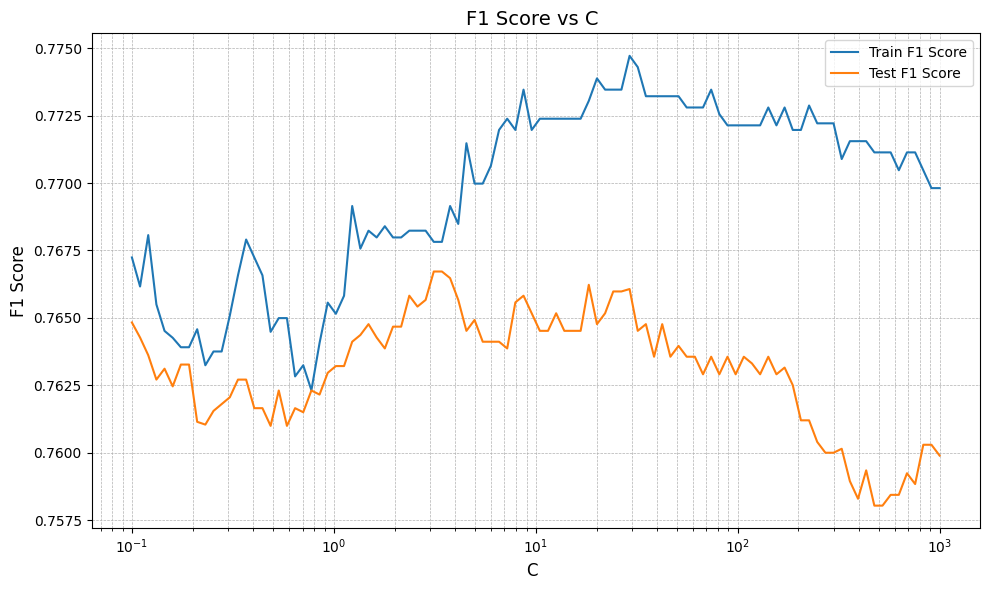

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

df = pd.read_csv("../df_elo_season_averages.csv")

train_season = 2007
test_season = 2008
train_df = df[df['SEASON'] == train_season]
test_df = df[df['SEASON'] == test_season]

shared_stats = [
    'PTS', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST',
    'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA',
    'OREB', 'DREB', 'STL', 'BLK', 'TO', 'PF'
]
feature_cols = (
    [f"HOME_{stat}_AVG_SEASON" for stat in shared_stats] +
    [f"AWAY_{stat}_AVG_SEASON" for stat in shared_stats]
)

X_train = train_df[feature_cols]
y_train = train_df['HOME_TEAM_WINS']
X_test = test_df[feature_cols]
y_test = test_df['HOME_TEAM_WINS']

best_gamma = 0.1
best_kernel = 'linear'

C_values = np.logspace(-1, 3, 100)
f1_train = []
f1_test = []

for C in C_values:
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(C=C, gamma=best_gamma, kernel=best_kernel, probability=True, random_state=42))
    ])
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    f1_train.append(f1_score(y_train, y_train_pred, zero_division=0))
    f1_test.append(f1_score(y_test, y_test_pred, zero_division=0))

plt.figure(figsize=(10, 6))
plt.plot(C_values, f1_train, label='Train F1 Score',linewidth=1.5)
plt.plot(C_values, f1_test, label='Test F1 Score', linewidth=1.5)
plt.xscale('log')
plt.xlabel('C ', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.title('F1 Score vs C ', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


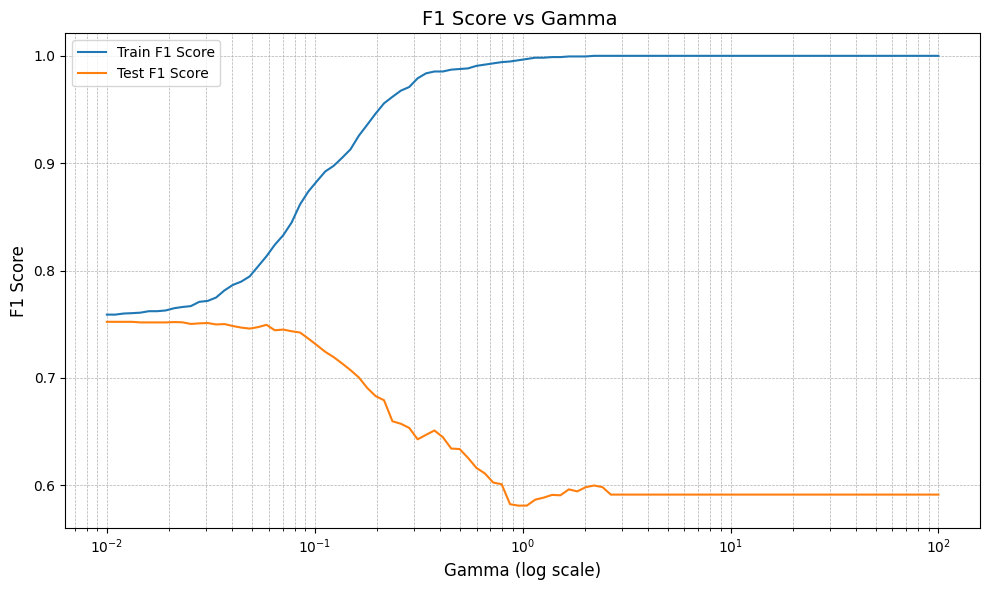

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

df = pd.read_csv("../df_elo_season_averages.csv")

train_season = 2007
test_season = 2008
train_df = df[df['SEASON'] == train_season]
test_df = df[df['SEASON'] == test_season]

shared_stats = [
    'PTS', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST',
    'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA',
    'OREB', 'DREB', 'STL', 'BLK', 'TO', 'PF'
]
feature_cols = (
    [f"HOME_{stat}_AVG_SEASON" for stat in shared_stats] +
    [f"AWAY_{stat}_AVG_SEASON" for stat in shared_stats]
)

X_train = train_df[feature_cols]
y_train = train_df['HOME_TEAM_WINS']
X_test = test_df[feature_cols]
y_test = test_df['HOME_TEAM_WINS']

gamma_values = np.logspace(-2, 2, 100)  
C_fixed = 0.1
kernel = 'poly'

f1_train = []
f1_test = []

for gamma in gamma_values:
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(C=C_fixed, gamma=gamma, kernel=kernel, probability=True, random_state=42))
    ])
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    f1_train.append(f1_score(y_train, y_train_pred, zero_division=0))
    f1_test.append(f1_score(y_test, y_test_pred, zero_division=0))

plt.figure(figsize=(10, 6))
plt.plot(gamma_values, f1_train, label='Train F1 Score', linewidth=1.5)
plt.plot(gamma_values, f1_test, label='Test F1 Score', linewidth=1.5)
plt.xscale('log')
plt.xlabel('Gamma (log scale)', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.title(f'F1 Score vs Gamma ', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


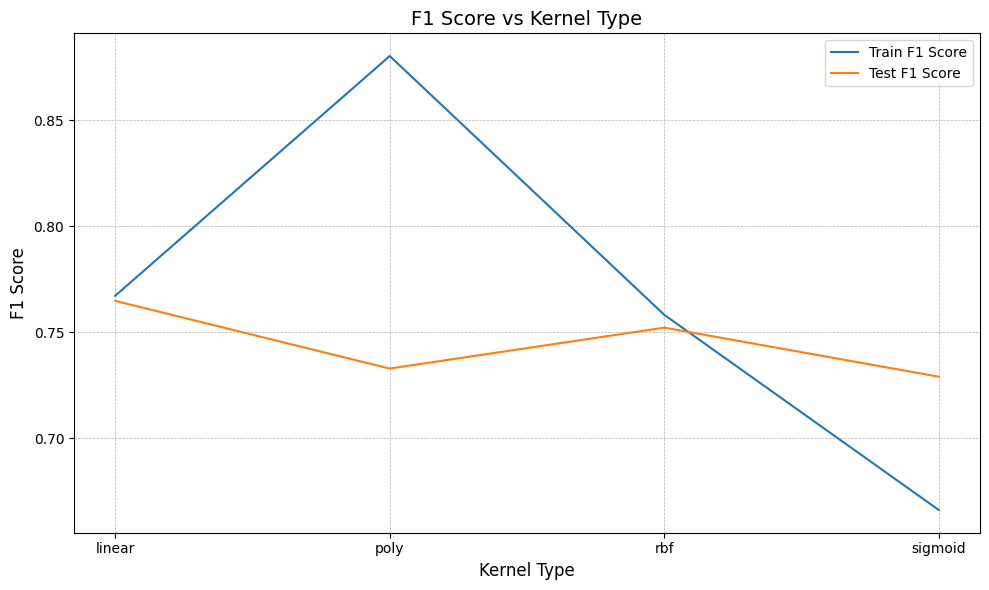

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

df = pd.read_csv("../df_elo_season_averages.csv")

train_season = 2007
test_season = 2008
train_df = df[df['SEASON'] == train_season]
test_df = df[df['SEASON'] == test_season]

shared_stats = [
    'PTS', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST',
    'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA',
    'OREB', 'DREB', 'STL', 'BLK', 'TO', 'PF'
]
feature_cols = (
    [f"HOME_{stat}_AVG_SEASON" for stat in shared_stats] +
    [f"AWAY_{stat}_AVG_SEASON" for stat in shared_stats]
)

X_train = train_df[feature_cols]
y_train = train_df['HOME_TEAM_WINS']
X_test = test_df[feature_cols]
y_test = test_df['HOME_TEAM_WINS']

C_fixed = 0.1
gamma_fixed = 0.1
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

f1_train = []
f1_test = []

for kernel in kernels:
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(C=C_fixed, gamma=gamma_fixed, kernel=kernel, probability=True, random_state=42))
    ])
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    f1_train.append(f1_score(y_train, y_train_pred, zero_division=0))
    f1_test.append(f1_score(y_test, y_test_pred, zero_division=0))

x = np.arange(len(kernels))
plt.figure(figsize=(10, 6))
plt.plot(x, f1_train, label='Train F1 Score', linewidth=1.5)
plt.plot(x, f1_test, label='Test F1 Score',  linewidth=1.5)
plt.xticks(x, kernels)
plt.xlabel('Kernel Type', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.title(f'F1 Score vs Kernel Type', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()
